In [1]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

In [2]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9} 
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
optimizer.optimize(fx.sphere, iters=1000)

2024-06-07 16:23:43,557 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=1.35e-43
2024-06-07 16:23:44,324 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.3467968916481554e-43, best pos: [3.66855836e-22 9.82265021e-24]


(1.3467968916481554e-43, array([3.66855836e-22, 9.82265021e-24]))

In [3]:
x_max = [2, 2]
x_min = [1, 1]
my_bounds = (x_min, x_max)

In [4]:
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=my_bounds)
best_cost, best_pos = optimizer.optimize(fx.sphere, iters=1000)

2024-06-07 16:24:22,233 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=2.03
2024-06-07 16:24:22,734 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.0255018987232587, best pos: [1.01175774 1.00092366]


In [5]:
print("Best cost: ", best_cost)
print("Best position: ", best_pos)

Best cost:  2.0255018987232587
Best position:  [1.01175774 1.00092366]


In [6]:
import numpy as np

In [7]:
x_max = np.ones(6)
x_min = np.zeros(6)
my_bounds = (x_min, x_max)

In [8]:
from pyswarms.utils.plotters import plot_cost_history


def endurance(variables):
    x, y, z, u, v, w = variables
    return np.exp(-2 * (y - np.sin(x)) ** 2) + np.sin(z * u) + np.cos(v * w)



In [9]:
def f(x):
    n_particles = x.shape[0]
    j = [endurance(x[i]) for i in range(n_particles)]
    return np.array(j)

In [10]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6, options=options, bounds=my_bounds)

In [11]:
best_cost, best_pos = optimizer.optimize(f, iters=1000)

2024-06-07 16:26:28,556 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.972
2024-06-07 16:26:29,097 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.9723964764206343, best pos: [2.09938480e-01 9.34505901e-01 6.92621575e-01 3.42155264e-04
 9.13547376e-01 9.82136047e-01]


In [12]:
print("Best cost: ", best_cost)
print("Best position: ", best_pos)

Best cost:  0.9723964764206343
Best position:  [2.09938480e-01 9.34505901e-01 6.92621575e-01 3.42155264e-04
 9.13547376e-01 9.82136047e-01]


dostosowanie kodu do maksymalizacji zamiast minimalizacji

In [13]:
# Funkcja endurance z minusem dla maksymalizacji
def endurance(variables):
    x, y, z, u, v, w = variables
    return -(np.exp(-2 * (y - np.sin(x)) ** 2) + np.sin(z * u) + np.cos(v * w))


def f(x):
    n_particles = x.shape[0]
    j = [endurance(x[i]) for i in range(n_particles)]
    return np.array(j)


optimizer = ps.single.GlobalBestPSO(
    n_particles=10, dimensions=6, options=options, bounds=my_bounds
)

best_cost, best_pos = optimizer.optimize(f, iters=1000)

print(f"Best cost: {best_cost}, best position: {best_pos}")

2024-06-07 16:27:19,567 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-2.83
2024-06-07 16:27:20,185 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.825311453091713, best pos: [0.70959704 0.61932897 0.98997077 0.99215768 0.28251685 0.32996401]


Best cost: -2.825311453091713, best position: [0.70959704 0.61932897 0.98997077 0.99215768 0.28251685 0.32996401]


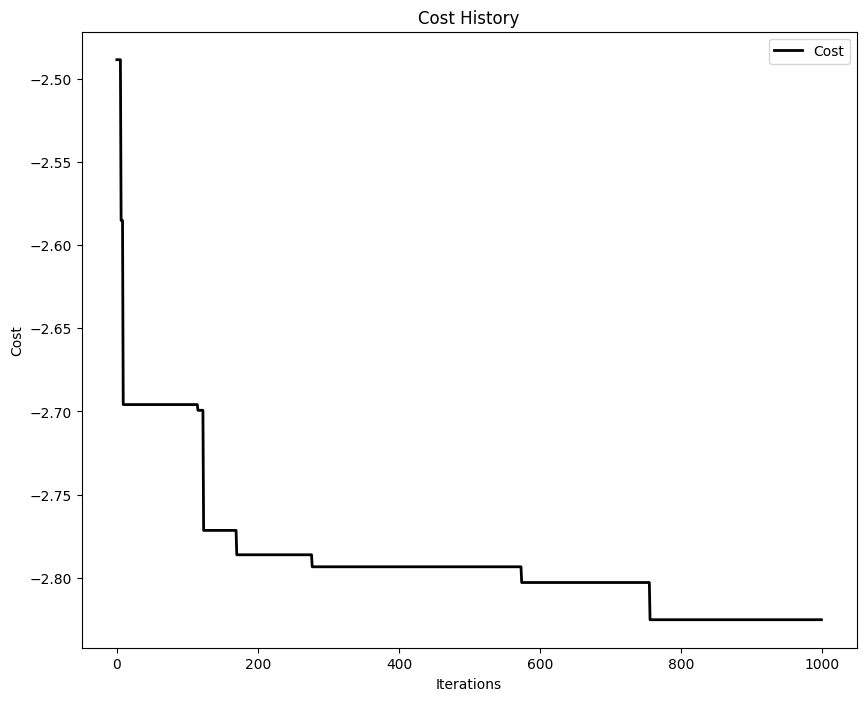

In [14]:
from pyswarms.utils.plotters import plot_cost_history
import matplotlib.pyplot as plt

plot_cost_history(optimizer.cost_history)
plt.show()